

## Colab / Jupyter Notebook 사용 단축키



- **Ctrl + Enter** : 해당 셀을 실행하고 커서를 해당 셀에 두는 경우 (결과 값만 보고자 할 때)

- **Shift + Enter** : 해당 셀을 실행하고 커서를 다음 셀로 넘기는 경우 (여러가지 값을 빠르게 출력할 때)

- **Alt + Enter** : 해당 셀을 실행하고 셀을 삽입한 후 커서를 삽입한 셀로 넘기는 경우 (다음 작업 공간이 없을 때

- **Ctrl + M A** : 코드 셀 위에 삽입
- **Ctrl + M B** : 코드 셀 아래 삽입
- **Ctrl + M D** : 셀 지우기
- **Ctrl + M Z** : 실행 취소
- **Ctrl + M I** : 실행 중지
- **Ctrl + M .** : 실행 강제 중지

- **Ctrl + M L** : 왼쪽 줄번호 표시
- **Ctrl + M Y** : 코드 셀로 변경
- **Ctrl + M M** : 마크다운 셀로 변경

- **SHIFT + M** : (셀 다중선택/shift key누른상태) 선택한 셀 병합
- **Ctrl + SHIFT + -** : (분리하고자 하는 줄에 커서를 놓고) 셀 분할






<br><br>

참고:단축키 상세설명 블로그 (https://surfonmedia.tistory.com/1)



In [3]:
# !pip install CoolProp==6.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 2.1 MB/s eta 0:00:0000:0100:01m


<br><br><br>

---

## CoolProp Function의 사용예시
이제 Python Colab을 통해서 CoolProp를 사용하는 예시와 값을 확인해 보겠습니다.
   
먼저 CoolProp 모듈을 불러옵니다. 설치합니다.

<br>

In [4]:
import CoolProp
print(CoolProp.__version__, CoolProp.__gitrevision__)

from CoolProp.CoolProp import PropsSI

# 정상적으로 불러오면, 최신버전인 6.4.x으로 시작하는 글자가 아래에 보입니다
# 6.4.3 bda1ba4edf6e4140952c5596e4af47521d21f7eb

6.4.3 85b56052816f43b74e49d6f6561a4383471f467f


<br>

CoolProp의 함수Function 중 자주 사용하는 2가지 함수에 대해서 설명합니다.

1. **PropsSI** : 일반적인 물성치
1. **HAPropsSI** : 습공기관련 물성치

<br>

### ----- 1) PropsSI Function -----
PropsSI의 사용가능한 입력변수와 단위Unit은 아래 링크에서 확인가능합니다.    
Function Units Reference ([LINK](http://www.coolprop.org/coolprop/HighLevelAPI.html#table-of-string-inputs-to-propssi-function))

In [5]:
# Density [kg/m3] of carbon dioxide at 100 bar(100 x 1e5 Pa) and 25'C
PropsSI('D', 'T', 273.15 + 25 , 'P', 100e5, 'CO2')

# 817.6273812375758

817.6273812375758

In [6]:
# Saturated vapop enthalpy [J/kg] of R134A at 25'C
PropsSI('H', 'T', 273.15 +25 , 'Q', 1, 'R134a')


412333.95323186804

In [7]:
# Saturated vapop enthalpy [J/kg] of R134A at 25'C
PropsSI('H', 'T', 273.15 +25 , 'Q', 1, 'R134a')

# 412333.95323186804

412333.95323186804

<br><br>

### ----- 2) HAPropsSI Function -----

In [6]:
# import the things you need
from CoolProp.HumidAirProp import HAPropsSI

/home/codespace/.python/current/lib/python3.10/site-packages/CoolProp/Plots/Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/CoolProp/Plots/Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/CoolProp/Plots/Common.py:655: UserWarning: An error occurred for inputs 8919111.614016, 2423.071691 with index (248,): unable to solve 1phase PY flash with Tmin=169.849, Tmax=682.5 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [247.231 J/mol/K] is above the maximum value of 247.211048112 J/mol/K
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/CoolProp/Plots/Common.py:655: UserWarning: An error occurred for inputs 9133000

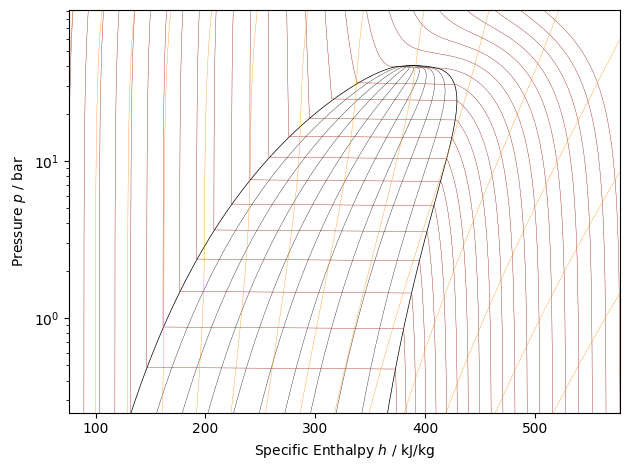

In [5]:
import CoolProp
from CoolProp.Plots import PropertyPlot

# For R134a in EUR Unit
plot = PropertyPlot('HEOS::R134a', 'PH', unit_system='EUR', tp_limits='ACHP')

# Create 11 lines of constant quality
# if you only want to see the dome, use num=2
plot.calc_isolines(CoolProp.iQ, num = 11)

# Create 25 lines of constant Temperature
plot.calc_isolines(CoolProp.iT, num=25)

# Create 15 lines of constant Smass
plot.calc_isolines(CoolProp.iSmass, num=15)

# Display and save the plot as a png
plot.show()
plot.savefig('R134a.png')

<br><br>

## **사용 예시_Actual Example**


### ex020: Steam Density


In [10]:
# Density [kg/m3] of Steam/Water at 10 bar(10 x 1e5 Pa) and 250'C
PropsSI('D', 'T', 273.15 + 250 , 'P', 10e5, 'Water')

# 4.296515473420293

4.296515473420293

In [11]:
# CoolProp Default function 을 사용한 물성치
# Density [kg/m3] of Saturated Water at 9.5 bar(9.5 x 1e5 Pa) and Quality 0
PropsSI('D', 'Q', 0 , 'P', 9.5e5, 'Water')

# 889.4849347499911

889.4849347499897

In [12]:
# Water - IF97 을 사용한 물성치
# Density [kg/m3] of Saturated Water at 9.5 bar(9.5 x 1e5 Pa) and Quality 0
PropsSI('D', 'Q', 0 , 'P', 9.5e5, 'IF97::Water')

# 889.4827583337902

889.4827583337902